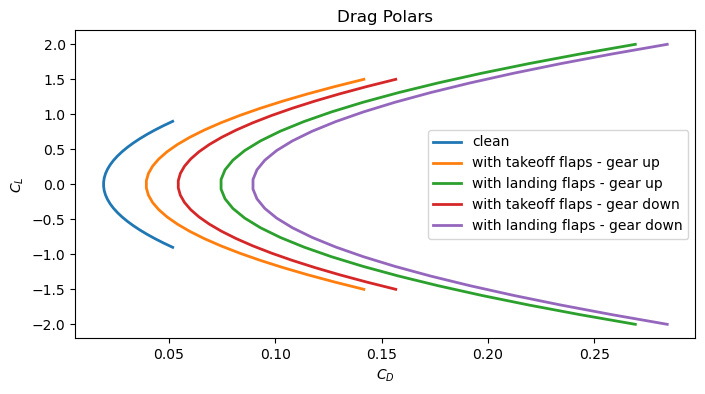

13.562877440000001


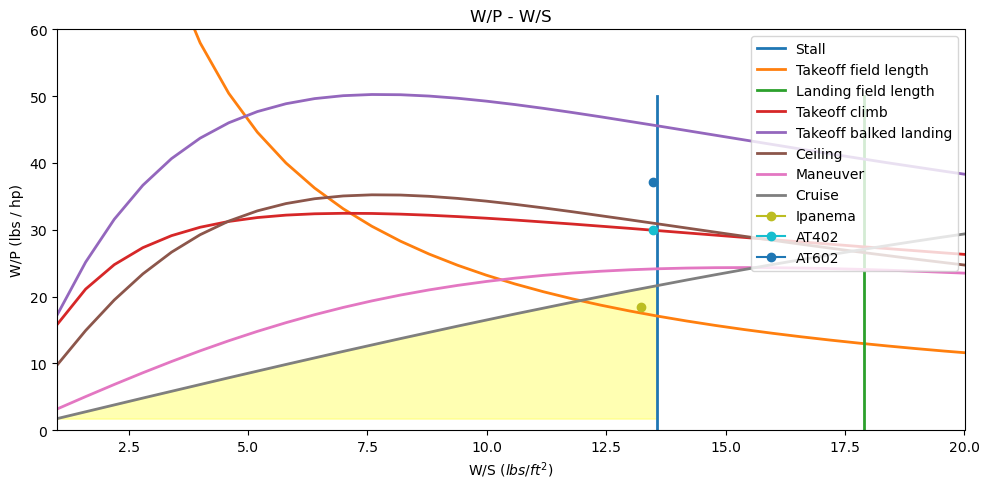

In [1]:
# EAE 130A - Aircraft Performance and Design
# Assignment 3 - Drag Polar
# Group 9
# 13 February 2025


import numpy as math 
import matplotlib.pyplot as plt

# Power to weight ratio converter function
def pwr(thurst_weight_ratio, eta_p, V):
    return thurst_weight_ratio / (550 * eta_p / V)


W_0 = 6409 # source - A2 report float(input("Enter the takeoff gross weight (lbs): "))
S_ref = 336 # source - Gama & Justin float(input("Enter the reference wing area (ft^2): "))
c = 1.0447 # Source - Gama
d = 0.5326 # Source - Gama
S_wet = (10 ** c) * (W_0 ** d)# 4605 * 142.45 # float(input("Enter the reference wing wet area (ft^2): "))

# DRAG POLAR
# From Metabook pg. 35
# From Figure 3.6 of Raymer's text, wetted area to reference wing area has been estimated to be 4 (Cessna Skyline RG)

S_wet_S_ref =  S_wet / S_ref # 4 - from Raymer's text
c_f = 0.0055 # figure 4.4 on Metabook - "light aircraft - single engine"

parasite_drag_coeff = c_f * S_wet_S_ref

AR = 28/3 # source - GAMA # using typical aspect ratio for estimations - NEED ACTUAL VALUE


cL_clean = math.linspace(-0.9, 0.9, 30)
cL_takeoff = math.linspace(-1.5, 1.5, 30)
cL_landing = math.linspace(-2, 2, 30)
cL_takeoff2 = math.linspace(-2.1, 2.1, 30)
cL_landing2 = math.linspace(-2.5, 2.5, 30)

eff_clean = 0.85 #float(input("Enter the Oswald efficiency for clean configuration (0.80 ~ 0.85): "))
eff_takeoff = 0.75 #float(input("Enter the Oswald efficiency for takeoff flaps configuration (0.75 ~ 0.80): "))
eff_landing_flaps = 0.7 #float(input("Enter the Oswald efficiency for landing flaps configuration (0.70 ~ 0.75): "))

delta_cD0_takeoff = 0.020 #float(input("Enter the change in parasite drag coefficient (C_D0) for takeoff flaps (0.010 ~ 0.020): "))
delta_cD0_landing_flaps = 0.055 #float(input("Enter the change in parasite drag coefficient (C_D0) for landing flaps (0.055 ~ 0.075): "))
delta_cD0_landing_gear = 0.015 #float(input("Enter the change in parasite drag coefficient (C_D0) for landing gear (0.015 ~ 0.025): "))

# Clean drag polar
cD_clean = parasite_drag_coeff + (1 / (math.pi * eff_clean * AR)) * (cL_clean ** 2)

# Takeoff flaps - gear up drag polar
cD_takeoff_1 = (parasite_drag_coeff + delta_cD0_takeoff) + (1 / (math.pi * eff_takeoff * AR)) * (cL_takeoff ** 2)

# Landing flaps - gear up drag polar
cD_landing_flaps_1 = (parasite_drag_coeff + delta_cD0_landing_flaps) + (1 / (math.pi * eff_landing_flaps * AR)) * (cL_landing ** 2)

# Takeoff flaps - gear down drag polar - this is here in case we decide to do a retractable one
cD_takeoff_2 = (parasite_drag_coeff + delta_cD0_takeoff + delta_cD0_landing_gear) + (1 / (math.pi * eff_takeoff * AR)) * (cL_takeoff ** 2)

# Landing flaps - gear down drag polar - this is here in case we decide to do a retractable one
cD_landing_flaps_2 = (parasite_drag_coeff + delta_cD0_landing_flaps + delta_cD0_landing_gear) + (1 / (math.pi * eff_landing_flaps * AR)) * (cL_landing ** 2)

# Landing gear drag polar
# cD_landing_gear = (parasite_drag_coeff + delta_cD0_landing_gear) + (1 / (math.pi * eff_clean * AR)) * (cL_landing ** 2) # Just used the clean efficiency here 
# (DELETE LATER: looks like that's what the sample code did as well)

plt.figure(figsize=(8,4))
plt.title('Drag Polars')
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.plot(cD_clean, cL_clean, label='clean', linestyle='-', linewidth=2)
plt.plot(cD_takeoff_1, cL_takeoff, label='with takeoff flaps - gear up', linestyle='-', linewidth=2)
plt.plot(cD_landing_flaps_1, cL_landing, label='with landing flaps - gear up', linestyle='-', linewidth=2)
plt.plot(cD_takeoff_2, cL_takeoff, label='with takeoff flaps - gear down', linestyle='-', linewidth=2) # if retractable
plt.plot(cD_landing_flaps_2, cL_landing, label='with landing flaps - gear down', linestyle='-', linewidth=2) # if retractable
# plt.plot(cD_landing_gear, cL_landing, label='with landing gear', linestyle='-', linewidth=2)
plt.legend(loc='best')
plt.show()



### POWER LOADING VS WING LOADING

# From Roskam pg. 122
# Power loading : W/P
# Power-to-weight ratio : P/W
# eta_p : propeller efficiency - thrust power produced by the propeller 
# (thrust * velocity) divided by the actual power provided by the engine. 

WS = math.linspace(1, 300, 500)
eta_p = 0.95 # changed for clarity # lec 08 slides table - for propeller efficiency #float(input("Enter the efficiency of the propeller: "))
V = 250 * 1.688 #float(input("Enter the maximum velocity (ft/s): ")) # Raymer's text pg. 123

# Stall - Metabook pg. 31 & from lec 07 slide 17
rho = 0.00238 # slugs/ft^3 - rho is the seal level standard value - Raymer's pg. 131
cL_max_takeoff = 1.6 # CHECK #float(input("Enter the cL_max of the wing: ")) #Needs to be approximated based on historical data
cL_max_cruise = 1.6 # CHECK
cL_max_landing = 1.6 # CHECK
V_stall = 50 * 1.688# ft/s approximation - stall speed of a small aircraft # math.sqrt((2 * W_0) / (rho * S_ref * cL_max)) #float(input("Enter the stall velocity (ft/s): "))
WS_stall = (1/2) * (rho) * (V_stall)**2 * cL_max_cruise

# Takeoff Field Length - Metabook pg. 37
# Sizing to FAR 23 (small aircrafts) requirements for propeller aircraft
s_to = 1500 # RFP #float(input("Enter the takeoff distance (ft): "))
a = 0.0149 
b = 8.134 
discriminant = b**2 - 4*a*(-s_to)
top23 = (-b + math.sqrt(discriminant)) / (2*a)

#print(top23)

rho_condition = 0.0023672 # at 200 ft - altitude  #float(input("Enter the air density expected at the field (slug/ft^3): "))
# Metabook pg. 38
power_weight_ratio_takeoff = WS / ((rho_condition / rho) * cL_max_takeoff * top23)

# Landing distance - Raymer's text pg. 138
s_a = 600 # ft - from Raymer's text pg. 138
#approach_speed = 1.3 * V_stall # Metabook pg. 38
#landing_time = 45 # float(input("Enter the approximate time it takes for the aircraft to land (s): "))
s_landing = 1500 # in ft
WS_landing = ( (s_landing - s_a) / 80 ) * ((rho_condition / rho) * cL_max_landing)

# Glide Constrain - set T/W = 0 and find the min C_L and we have to do this for single engine aircraft
#Referencing Raymer's text pg. 146
# C_L = W/qS and W/qS is given as the following equation 
G1 = 0.03 #float(input("Enter the climb gradient of the aircraft during initial climb (G): ")) # G is the climb gradient - ratio between vertical and horizontal distance traveled 
G2 = 0.03 #float(input("Enter the climb gradient of the aircraft during balked landing (G): "))
#Plugging in -G as glide is a climb in the negative direction and setting T/W = 0 
cd_0 = parasite_drag_coeff #+ delta_cD0_landing_flaps + delta_cD0_landing_gear

# Climb - formulas using from Matabook pg. 41
cL_max_climb = cL_max_takeoff # float(input("Enter the cL_max during climb: "))
# Note that the L / D for climb might be lower than the L / D during cruising ﬂight, 
# especially during initial climb when the gear and ﬂaps might still be down. - Raymer's text pg. 125
#V_vertical = float(input("Enter the vertical velocity during climb (ft/s): "))
# aircraft’s vertical velocity during the climb is usually speciﬁed in the design requirements
# or in military or civilian speciﬁcations (see Appendix F, Table F.2).
# V_vertical = rate of climb - Raymer's text pg. 145

# G >= 0.04 - inital climb
G3 = 0.083
V_climb = V_stall * 1.1
q = 0.5 * rho * (V_climb)**2
power_weight_ratio_climb1 = ((V_climb/eta_p) * (G3 + (2 * math.sqrt(cd_0 / (AR * math.pi * eff_clean))))) / 550
power_weight_ratio_climb2 = ((V_climb/eta_p) * (G3 + ((q * cd_0 / WS) + (WS / (AR * math.pi * eff_clean * q))))) / 550

# the + 0.2 comes from Roskam recommending a margin of 0.2 to the CLmax corresponding to the climb configuration. - Metabook pg. 41

#corrected ratio
power_weight_ratio_climb_takeoff1 = power_weight_ratio_climb1 * math.ones(500) / 0.8
power_weight_ratio_climb_takeoff2 = power_weight_ratio_climb2 / 0.8

# G >= 0.03 - balked landing
G1 = 0.03
V_balked = V_stall * 1.15
q = 0.5 * rho * (V_balked)**2
power_weight_ratio_climb3 = ((V_balked/eta_p) * (G1 + (2 * math.sqrt(cd_0 / (AR * math.pi * eff_clean))))) / 550
power_weight_ratio_climb4 = ((V_balked/eta_p) * (G1 + ((q * cd_0 / WS) + (WS / (AR * math.pi * eff_clean * q))))) / 550

#corrected ratio
power_weight_ratio_climb_takeoff3 = power_weight_ratio_climb3 * math.ones(500) / 0.8
power_weight_ratio_climb_takeoff4 = power_weight_ratio_climb4 / 0.8


# Ceiling - Metabook pg. 42, 47 - this equation is in regards to high altitude - our aircraft is not flying that high ?? 
# q is the dynamic pressure - metabook pg. 42 - very low since we are looking for the min P/W ratio - in regards to high altitude
# G3 = 0.001 # as suggested by Metabook pg. 47
#thurst_weight_ratio_ceiling = (1 / ((rho_condition / rho) ** 0.6)) * (G3 + math.sqrt(parasite_drag_coeff / (math.pi * AR * eff_takeoff)))

# 2 * (math.sqrt((parasite_drag_coeff) / (math.pi * AR * eff_clean))) + G3

#power_weight_ratio_ceiling = pwr(thurst_weight_ratio_ceiling, eta_p, V)

#setting G = 0 for absolute ceiling - from Metabook pg. 42
V_ceiling = V * 0.56
Gceiling = (100 / 60) / V_ceiling
power_weight_ratio_ceiling1 = ((V_ceiling/eta_p) * (Gceiling + (2 * math.sqrt(cd_0 / (AR * math.pi * eff_clean))))) / 550
power_weight_ratio_ceiling2 = ((V_ceiling/eta_p) * (Gceiling + ((q * cd_0 / WS) + (WS / (AR * math.pi * eff_clean * q))))) / 550



# Maneuver - Metabook pg. 42
n = 2 # float(input("Enter the load factor (#g): "))
V_mn = math.sqrt(2000 * 32.174 / math.sqrt(3))
q_maneuver = q = 0.5 * rho * V_mn**2
power_weight_ratio_maneuver = ((V_mn/eta_p) * (2 * n * math.sqrt(cd_0 / (AR * math.pi * eff_clean)))) / 550
power_weight_ratio_maneuver2 = ((V_mn/eta_p) * ((q * cd_0 / WS) + (WS * (n**2) / (AR * math.pi * eff_clean * q)))) / 550





# Cruise - metabook pg. 43
v_cruise = V * 0.56
q_cruise = 0.5 * rho * v_cruise**2
power_weight_ratio_cruise = ((q_cruise * v_cruise * (cd_0 + ((WS**2)*(0.956**2) / ((q_cruise**2) * math.pi * AR * eff_clean)))) / (550 * eta_p * WS)) # metabook pg. 43

print(WS_stall)
WS_stall = WS_stall * math.ones(500)
WS_landing = WS_landing * math.ones(500)
power_weight_ratio_ceiling1 = power_weight_ratio_ceiling1 * math.ones(500)
power_weight_ratio_maneuver = power_weight_ratio_maneuver * math.ones(500)
# From simple Google search 
power_loading_Ipanema = 3968 / 300 # lbs / hp 
WS_Ipanema = 3968 / 214.6 # lbs / ft^2
power_loading_AT402 = 9170 / 680 # lbs / hp 
WS_AT402 = 9170 / 306 # lbs / ft^2
power_loading_AT602 = 12500 / 1050 # lbs / hp 
WS_AT602 = 12500 / 336 # lbs / ft^2

plt.figure(figsize=(10,5))
plt.title('W/P - W/S')
plt.xlabel("W/S $(lbs / ft^2)$")
plt.ylabel("W/P (lbs / hp)")
plt.plot(WS_stall, math.linspace(0,50,500), label='Stall', linestyle='-', linewidth=2)
plt.plot(WS, (1/power_weight_ratio_takeoff), label='Takeoff field length', linestyle='-', linewidth=2)
plt.plot(WS_landing, math.linspace(0,50,500), label='Landing field length', linestyle='-', linewidth=2)
#plt.plot(WS, (1/power_weight_ratio_climb_takeoff1), label='Takeoff climb min', linestyle='-', linewidth=2)
plt.plot(WS, (1/power_weight_ratio_climb_takeoff2), label='Takeoff climb ', linestyle='-', linewidth=2)
#plt.plot(WS, (1/power_weight_ratio_climb_takeoff3), label='Takeoff balked landing min', linestyle='-', linewidth=2)
plt.plot(WS, (1/power_weight_ratio_climb_takeoff4), label='Takeoff balked landing', linestyle='-', linewidth=2)
#plt.plot(WS, (1/power_weight_ratio_ceiling1), label='Ceiling Min', linestyle='-', linewidth=2)
plt.plot(WS, (1/power_weight_ratio_ceiling2), label='Ceiling', linestyle='-', linewidth=2)
#plt.plot(WS, (1/power_weight_ratio_maneuver), label='Maneuver Min', linestyle='-', linewidth=2)
plt.plot(WS, (1/power_weight_ratio_maneuver2), label='Maneuver', linestyle='-', linewidth=2)
plt.plot(WS, (1/power_weight_ratio_cruise), label='Cruise', linestyle='-', linewidth=2)
plt.plot(power_loading_Ipanema, WS_Ipanema, label='Ipanema', marker="o")
plt.plot(power_loading_AT402, WS_AT402, label='AT402', marker="o")
plt.plot(power_loading_AT402, WS_AT602, label='AT602', marker="o")

# Shading the region
plt.fill_betweenx((1/power_weight_ratio_cruise[:22]), WS[:22], 13.562877440000001, color='yellow', alpha=0.3)
plt.ylim(0, 60)
plt.xlim(1, 20)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
